In [3]:
import pandas as pd
import missingno as msno
import numpy as np
%matplotlib inline

In [4]:
file = 'C:/Users/Ivan/Desktop/listings.csv'

In [5]:
df = pd.read_csv(file)

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,65,2019-09-04,0.56,1,53
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,2018-07-15,0.55,2,48
2,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,2,2017-07-03,0.03,1,354
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,64,2019-07-07,0.63,1,301
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,136,2019-07-10,1.19,1,337


In [9]:
df_copy = df.copy()

In [10]:
df_copy.shape

(20837, 16)

In [22]:
df_copy.shape[0]

20837

In [24]:
df_copy.shape[1]

16

In [27]:
df_copy.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [29]:
list(df_copy.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [32]:
df_copy['room_type'].value_counts()

Entire home/apt    12583
Private room        7503
Hotel room           477
Shared room          274
Name: room_type, dtype: int64

In [34]:
df_copy['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [36]:
l = []
bandera = np.NAN
for column in df_copy.columns:
    if df_copy[column].dtype == np.int64:
        bandera = 'entero'
    elif df_copy[column].dtype == np.float64:
        bandera = 'flotante'
    else:
        bandera = 'otro'
        
    try:
        df_copy[column] =df_copy[column].astype('int64')
    except:
        l.append(column)
        
    print('COLUMNA: ', column)
    print('TIPO: ', bandera)
    print('NUNIQUE: ', df_copy[column].nunique())
    print('UNIQUE: ', df_copy[column].unique())
    print('VALUE COUNTS ', df_copy[column].value_counts())
    print('\n')

COLUMNA:  id
TIPO:  entero
NUNIQUE:  20837
UNIQUE:  [    6369    21853    24805 ... 38727654 38728727 38730025]
VALUE COUNTS  923645      1
34558687    1
17816254    1
1149636     1
34861739    1
33725126    1
18770632    1
37184201    1
34798282    1
35156683    1
14535372    1
4309709     1
14232272    1
25544785    1
36067105    1
31005398    1
6974168     1
30247073    1
29121657    1
16216763    1
21686968    1
23764357    1
13722281    1
24324849    1
37594778    1
34677409    1
20230819    1
21863078    1
2527911     1
35121832    1
           ..
37895501    1
20856125    1
763214      1
37045586    1
21099860    1
35065731    1
31235417    1
16944475    1
177500      1
25863486    1
24907067    1
36422946    1
20161838    1
22236451    1
35173352    1
7398694     1
38321903    1
22355241    1
20329772    1
867629      1
25537839    1
19367226    1
17749296    1
19017959    1
18763059    1
34699929    1
38202679    1
24941880    1
11672889    1
13664256    1
Name: id, Length: 20

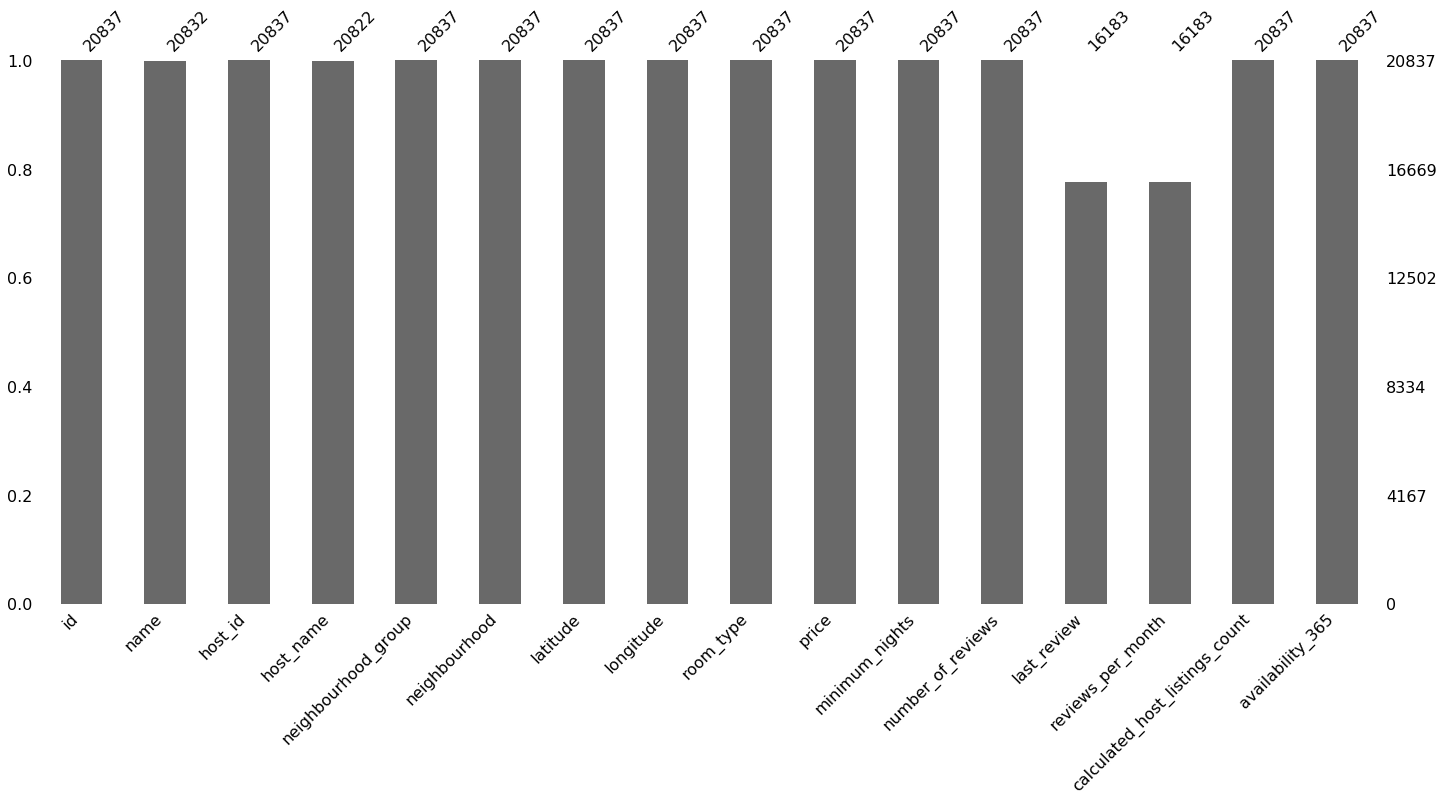

In [11]:
msno.bar(df_copy)

In [13]:
df_copy.isnull().any().any()

True

In [15]:
df_copy.replace(to_replace='&',value=np.nan,inplace=True)

In [17]:
df_copy.replace(to_replace=' ',value=np.nan,inplace=True)

In [19]:
df_copy.isnull().any().any()

True

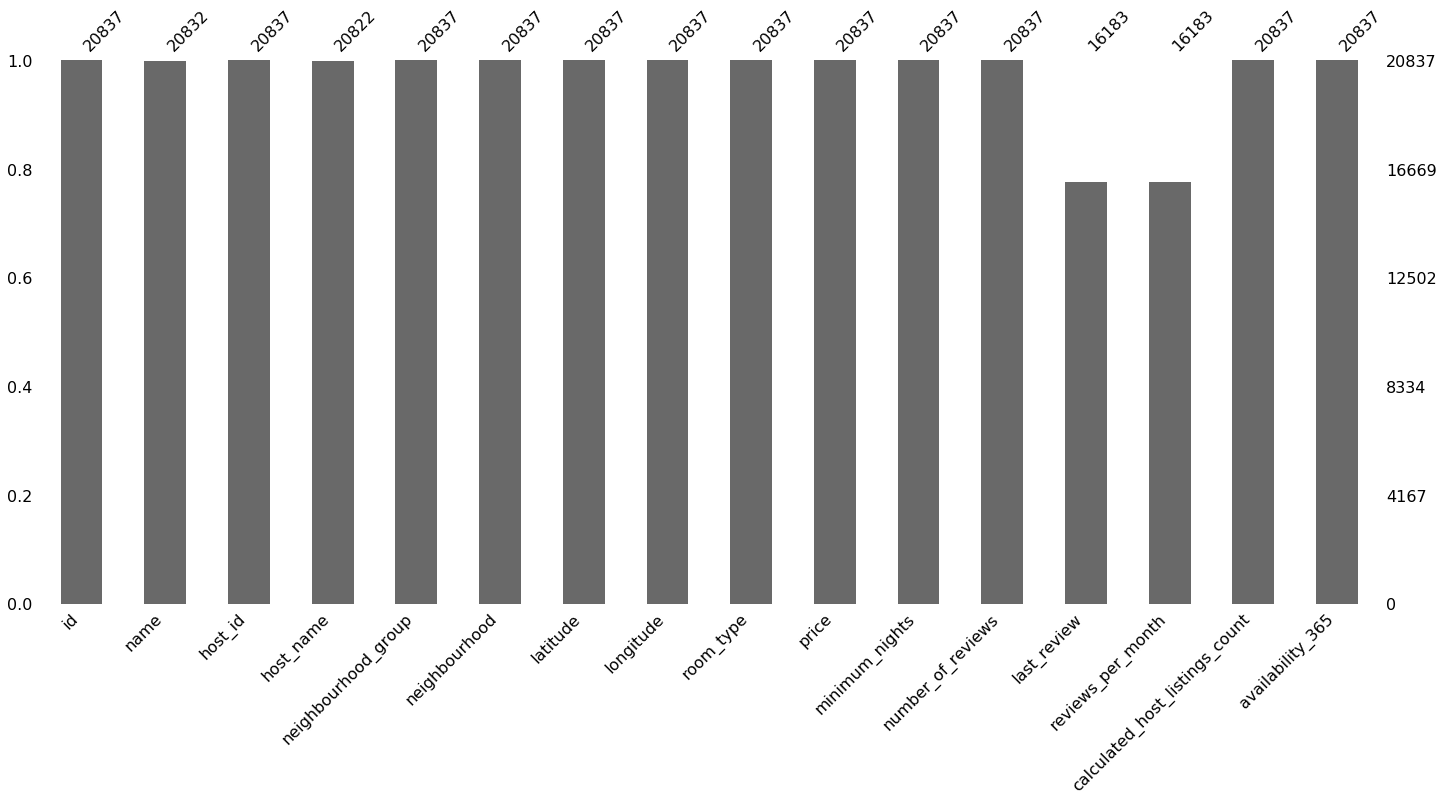

In [21]:
msno.bar(df_copy)

In [28]:
file = 'C:/Users/Ivan/Desktop/listings.csv'

In [29]:
df_copy.to_csv(file)

**Clean**

In [31]:
df_copy.fillna(value=-1, inplace=True)

In [33]:
threshold = round(df_copy.shape[0]*.75)
threshold

12128

In [35]:
l = []
for column in df_copy.columns:
    na_column =  df_copy[column].value_counts().get(-1)
    if(na_column != None):
        print(column, ': ', df_copy.shape[0] - na_column, ' - ', threshold)
        if (df_copy.shape[0] - na_column < threshold):
            print(column, ': ', 'd e l e t e d')
            l.append(column)

name :  16170  -  12128
host_name :  16170  -  12128
neighbourhood_group :  16143  -  12128
neighbourhood :  16170  -  12128
room_type :  15995  -  12128
last_review :  16170  -  12128


In [37]:
l

[]

In [39]:
df_copy.drop(labels=l, axis=1, inplace=True)

In [41]:
df_copy.replace(to_replace=-1, value=np.NaN, inplace=True)

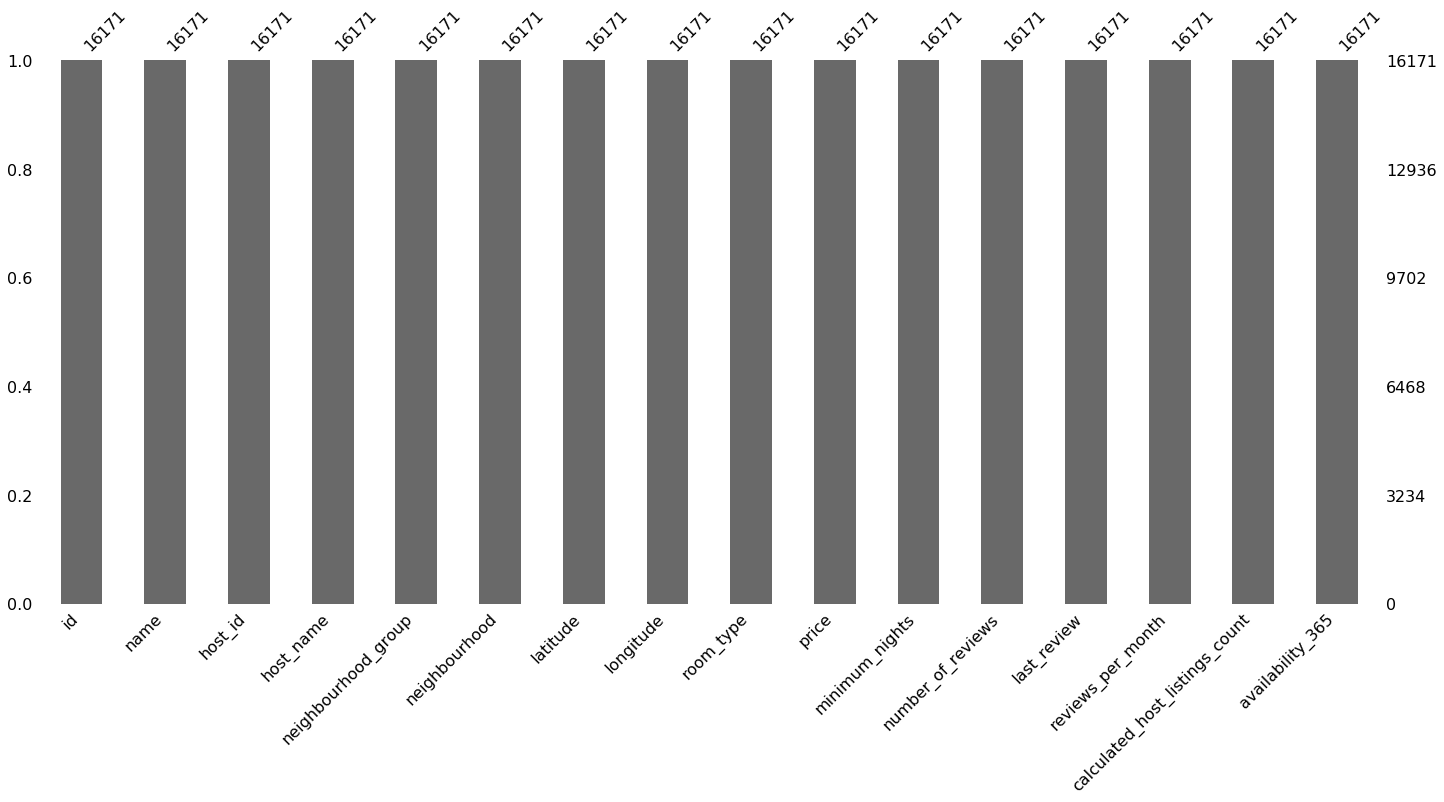

In [43]:
msno.bar(df_copy)

In [45]:
file = 'C:/Users/Ivan/Desktop/listings.csv'

In [46]:
df_copy.to_csv(file)

A estas alturas podemos también eliminar simplemente las observaciones que tienen valores nulos

df_copy.dropna(inplace=True)